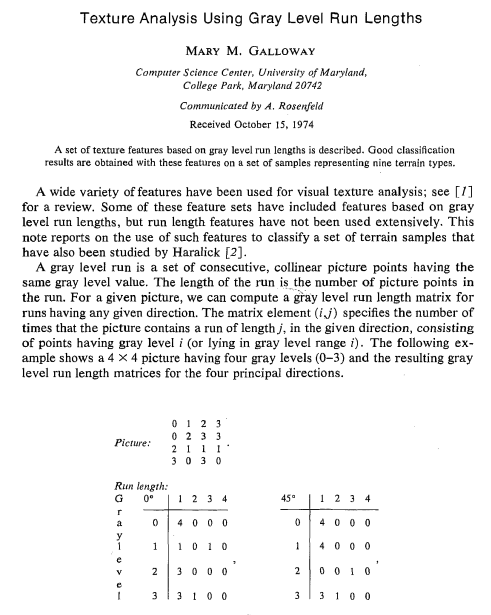

# copyright:

    --> Todos os direitos reservados a Pablo de Abreu Vieira.

    --> Não é permitido o compatilhamento deste arquivo ou qualquer partes dele para terceiros, pela internet ou qualquer outra modalidade de compartilhamento, exceto para à atividade do curso.

# Manual:

    1º --> Carregue as bibliotecas;
    2º --> Carregue a função maiorvalor();
    3º --> Carregue a função funcaoRotacaoDaImagem();
    4º --> Carregue a função GLRLM();
    5º --> A função funcaoMatrizLeitura(), tem função somente de leitura da matriz GLRLM, então seu carregamento é opicional;
    6º --> Carregue as funções: RF1,RF2,RF3,RF4 e RF5;
    7º --> A matriz Luzana serve apenas para teste, seu carregamento é opicional;
    8º --> Carregue a função programaGLRLM();
    9º --> Carregue a função rodaRoda();
    10º --> Ao final os cvs's poderão ser gerados.

In [ ]:
import random
import numpy as np
import pandas as pd
from skimage.io import imread, imshow
from skimage.color import rgb2gray

import cv2
import math

import matplotlib.pyplot as plt

import time

from multiprocessing.dummy import Pool as ThreadPool 

from skimage.io import imread_collection

import os, sys

# Função 'maiorvalor( )'

## Essão Função Pegar o Maior Valor do Array:

In [ ]:
# Função Para Retornar o Maior Valor (pixel de maior valor):
def maiorvalor(mat, l, c):
    """
    Função maiorvalor.
    
    Essa função recebe como parâmetros:
    
        mat --> uma matriz;
        l --> o tamanho de linhas da matriz;
        c --> o tamanho de colunas da matriz.
    
    Essa função retorna:
        
        O valor do maior pixel.
        
    Observação: Alterar essa função pode ser alterada por: np.max(mat).
    """
    # Iniciando o bins com o valor do primeiro pixel[0][0],
    # para iniciar o for.
    bins = mat[0][0]
    
    # Percorrendo as linhas da matriz:
    for i in range(0,l):
        # Percorrendo as colunas da matriz:
        for j in range(0,c):
            # Se o pixel for maior que bins faça:
            if mat[i][j] > bins:
                bins = mat[i][j] # Armazene o valor do pixel em bins.
    return bins # Retorn bins (pixel de maior valor).

# funcaoRotacaoDaImagem( )

In [ ]:
def funcaoRotacaoDaImagem(mat, graus = 0):
    
    """
    Função rotacaoDaImagem:
    
    Essa função recebe como parâmetro:
    
        mat --> uma matriz (imagem);
        
        graus --> o grau no qual a matriz irá rotacionar:
            
            * Os graus podem ser: 0º, 45º, 90º, 135.
            
    
    A função funcaoRotacao faz:
        
        * Essa função recebe uma imagem, e de acordo com grau de rotação
        escolhido e faz uma rotaçao na imagem.
        * Essa função retorna uma imagem rotacionada ou não. 
    
    Observação --> Essa função já faz o tratamento dos cantos da matriz;
    Quando a matriz faz a rotação em 45º e 135º ela pede dados dos cantos;
    
    Isso só é possivel por conta da trigonometria.
    
        --> É provável que em anos anteriores você já tenha estudado;
        as razões trigonométricas seno e cosseno associados a ângulos;
        de triângulos. Em geral, nesse contexto, essas razões têm por;
        objetivo determinar medidas de ângulos e lados dos triângulos.
            -->  tratando as razões seno, cosseno em uma circunferência. 
            Para isto, vamos abordar tópicos como arcos e medidas de arcos;
            em uma circunferência. a circunferência trigonométrica e redução;
            ao primeiro quadrante.
        
        --> Link: 
        https://blogdoenem.com.br/circunferencia-trigonometrica-seno-e-cosseno-de-um-arco-matematica-enem/
    """
    # Se os graus forem iguais a: 0,45,90,135 faça:
    if graus == 0 or graus == 45 or graus == 90 or graus == 135:
        
        # Pegando somente a quantidade de linhas e colunas:
        # Desta forma consigo garantir pegar o shape tanto de:
        # Imagens coloridas ou em escala de cinza.
        linhas, colunas = mat.shape[:2]

        # Descobrindo o centro da imagem, para poder fazer a rotação:
        centroImagem = (colunas / 2, linhas / 2)

        # Usando cv2.getRotationMatrix2D, para rotacionar a imagem;
        # De acordo com o angulos selecionado
        imagemRotacionada = cv2.getRotationMatrix2D(centroImagem, graus, 1)

        # Calculando o radiano:
        radianos = math.radians(graus)
        # Calculando o seno:
        seno = math.sin(radianos)
        # Calculando o coseno:
        coseno = math.cos(radianos)

        # Calculando os limites das linhas e colunas:
        # Utilizando o Seno e Coseno de um Arco:
        limiteC = int((linhas * abs(seno)) + (colunas * abs(coseno)))
        limiteL = int((linhas * abs(coseno)) + (colunas * abs(seno)))

        # Aumentando a 'tela,caixa' da imagem (sem alterar o tamanho da imagem),
        # Para que a rotação não tire os cantos da imagem.
        imagemRotacionada[0, 2] += ((limiteC / 2) - centroImagem[0])
        imagemRotacionada[1, 2] += ((limiteL / 2) - centroImagem[1])
        
        
        # Usando o warPaffine para terminar de montar a imagem.
        imagemRotacionada = cv2.warpAffine(mat, imagemRotacionada, (limiteC, limiteL))
        
        # Retornando a imagem rotacionada.
        return imagemRotacionada#, linhas, colunas ## Mudei linhas e colunas
    
    # Se os graus forem diferentes faça:
    else:
        
        print('Essa função somente suporta os graus: 0º, 45º, 90º, 135.')

# GLRLM

In [ ]:
def GLRLM(mat):
    
    """
    
    Função GLRLM.
    
    Essa função recebe como parâmetros:
    
        mat --> uma matriz;
        l --> o tamanho de linhas da matriz;
        c --> o tamanho de colunas da matriz;
        graus --> o grau qual a matriz irá ser rotacionada;
        
    A função GLRLM faz:
        
        Recebe uma matriz de entrada e cria uma matriz GLRLM.
        A transformação ocorre de acordo com a especificação do artigo:
            --> Texture Analysis Using Gray Level Run Lengths.
            --> Autor: MARY M. GALLOWAY.
        
    A matriz 'flag' serve para auxiliar na construção da matriz GLRLM de Sáida.
    
    A matriz 'result' será a matriz resultante GLRLM.
    
    Observação: A criação da matriz 'flag' pode ser subistituido por: np.zeros((l,c)):
    Observação: A criação da matriz 'result' pode ser subistituido por: np.zeros((l,c)):

    """
    
    # Pegando somente a quantidade de linhas e colunas:
    # Desta forma consigo garantir pegar o shape tanto de:
    # Imagens coloridas ou em escala de cinza.
    l, c = mat.shape[:2]
    #print(l,c)
    
    # Definindo a matriz flag:
    #flag=[[0]*l for x in range(c)]
    flag = np.zeros((l,c))
    # Transformando 'flag' em array:
    flag = np.array(flag,dtype=np.int64)

    # Imprimindo a matriz de entrada (imagem):
    
    # Percorrendo as linhas da matriz:
    #for i in range(0,l):
        # Percorrendo as colunas da matriz:
        #for j in range(0,c):
            # Imprimindo a matriz:
            #print(mat[i][j], end=" ")
        #print()

    # Invocando a função 'maiorvalor()' para pegar o pixel de maior valor.
    bins = maiorvalor(mat, l, c) 
    bins += 1
    
    # Definindo a matriz result:
    result = [[0]*c for x in range(0,bins)]
    # Transformando 'result' em array:
    result = np.array(result,dtype=np.int64)

    # Loop principal:
    
    # Percorrendo todas as linhas de mat:
    #for i in range(0, l):
    for i in range(l):
        # Percorrendo todas as colunas de mat:
        #for j in range(0, c):
        for j in range(c):

            # Se esse pixel já tiver sido visitado, continue:
            if flag[i][j]:
                continue

            # Marcando a flag com 1 pois o elemento já foi visitado:
            flag[i][j] = 1
            cont = 1
            
            # Segunda interação:
            
                # Essa interação se da com o viznho ao lado (Próximo vizinho);
                # Ela se da após a verificação anterior.
           
            # percorrendo a partir do próximo elemento:
            for k in range(j+1,c):
                
                # Verifica se o vizinho é igual e se a ainda nao foi visitado (flag == 0):
                if mat[i][j] == mat[i][k] and flag[i][k] == 0:

                    # Se for igual, ocorrerá o incremento em cont;
                    # E o flag do vizinho será marcado como 1 (porque já foi visitado):
                    
                    cont+=1;

                    flag[i][k] = 1
                
                # Caso contrario:
                else:
                    break
    
            result[mat[i][j]][cont-1] += 1
            

    # Mostrar o resultado pixel por pixel(i, j)
    # print("\n printando o resulatdo")
    # for i in range(0, bins):
    #     for j in range(0, c):
    #         print("{}".format(result[i][j]), end=" ")
    #     print()

    #mostrar o resultado (numpy.matrix)
    #print("\n")
    #result = np.matrix(result)
    result = np.array(result)
    #print(result)
   
    return result

In [ ]:
def funcaoMatrizLeitura(matriz):
    
    """
    Função funcaoMatrizLeitura:
    
    Essa função recebe como parâmetro:
    
        matriz --> uma matriz resultante do processamento de: GLRLM.
    
    A função funcaoMatrizLeitura faz:
        
        Essa função recebe a matriz (glrlm) e imprime ela de forma legivel;
            Para facilitar a leitura.
    """
    # Pegando o shape da matriz:
    w,q = matriz.shape
    #print(w,q)
    # Variaveis de auxilio:
    start=1
    count=q # O count recebe a quantidade de linhas.
    # A partir do tamanho de 'q' é criado um list 'unicos':
    unicos = [num for num in range(start,start+count)]
    #unicos
    # Utilizando a feramenta DataFrame para imprimir a tabela com os indices:
    # O indice da da quantidade de repetição é 'unicos'.
    matSaida = pd.DataFrame(matriz, columns=list(unicos))
    # printando a saída.
    #print(matSaida)
    print(matSaida.shape)
    return matSaida

# Função RF1( ):

### Formula:

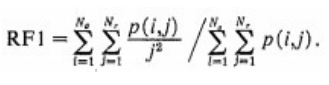

p (i, j) ser a entrada (i, j) na matriz de comprimento de percurso determinada;
N, seja o número de níveis de cinza na imagem,
Nr é o número de comprimentos de execução diferentes que ocorrem (de modo que a matriz é Não
por Nr) e
P é o número de pontos na imagem.

In [ ]:
def RF1(mat):
    
    """
    Função RF1:
    
    Essa função recebe como parâmetro:
    
        mat --> uma matriz resultante do processamento de: GLRLM.
    
    A função RF1 faz:
        
        Divide cada valor de comprimento de execução pelo comprimento; 
        da corrida ao quadrado. 
        Isso tende a enfatizar pequenas tiragens. 
        O denominador é o número total de execuções;
        na figura e serve como um fator de normalização.
    
    A Função RF1 Devolve um valor.
    
    """
    
    # Pegando somente a quantidade de linhas e colunas:
    # Desta forma consigo garantir pegar o shape tanto de:
    # Imagens coloridas ou em escala de cinza.
    linhas, colunas = mat.shape[:2]
    
    # Somatorio da esquerda na formula:
    somatorio1 = 0
    # Somatorio da direita na formula:
    somatorio2 = 0 
    
    # Percorrendo Linhas:
    for l in range(linhas):
        # O j representa o j da formula qual tem função do indice;
        # Que indica a quantidade de repetição dos valores.
        # Ele inicia com valor 0.
        # Ele zera sempre que a interação das colunas termina;
        # E retornar a interação das linhas, para o indice;
        # Estar sempre correto.
        j = 0
        # Percorrendo Colunas:
        for c in range(colunas):
            
            # Passando o 'pixel' para a variavel pixel (rsr):
            pixel = mat[l][c]
            # j rece 1 pois o indice começa com 1.
            j += 1
            # Elevando j ao quadrado como exige a formula.
            quadrado = j**2
            
            # Calculando somatorio1
            #if pixel > 0:
            
            # Somatorio1 soma os valores dos  pixels / por j's ao quadrado:
            somatorio1 += pixel / quadrado
            
            # Calculando somatorio1
            #if pixel > 0:
            
            # Somatorio2 soma os valores de pixels:
            somatorio2 += pixel
    
    # Gerando o valor de: somatorio1/somatorio2:           
    saida = somatorio1/somatorio2
    
    # Impressão para saber os valores dos somatorios:
    #print(somatorio1,somatorio2) 
    
    # Retornando o valor do calculo total:
    return saida

# Matriz Luzana para testar as funçes:

    --> Matriz luzana.. 

In [ ]:
luzana = np.zeros((3,3))
luzana[0][0] = 2
luzana[1][0] = 1
luzana[1][1] = 1
luzana[2][0] = 1
luzana[2][2] = 1
luzana

In [ ]:
sa = RF1(luzana)
sa

In [ ]:
luzana.shape

# Função RF2( ):

### Formula:

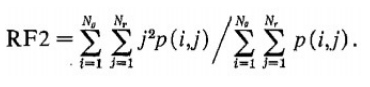

p (i, j) ser a entrada (i, j) na matriz de comprimento de percurso determinada;
N, seja o número de níveis de cinza na imagem,
Nr é o número de comprimentos de execução diferentes que ocorrem (de modo que a matriz é Não
por Nr) e
P é o número de pontos na imagem.

In [ ]:
def RF2(mat):
    
    """
    Função RF2:
    
    Essa função recebe como parâmetro:
    
        mat --> uma matriz resultante do processamento de: GLRLM.
    
    A função RF2 faz:
        
        Essa função multiplica cada valor de comprimento de execução;
        pelo comprimento da corrida ao quadrado. 
        Isso deve enfatizar as corridas longas. 
        O denominador é um fator de normalização, como acima.
    
    A Função RF2 Devolve um valor.
    
    """
    
    # Pegando somente a quantidade de linhas e colunas:
    # Desta forma consigo garantir pegar o shape tanto de:
    # Imagens coloridas ou em escala de cinza.
    linhas, colunas = mat.shape[:2]
    
    # Somatorio da esquerda na formula:
    somatorio1 = 0
    # Somatorio da direita na formula:
    somatorio2 = 0 
    
    # Percorrendo Linhas:
    for l in range(linhas):
        # O j representa o j da formula qual tem função do indice;
        # Que indica a quantidade de repetição dos valores.
        # Ele inicia com valor 0.
        # Ele zera sempre que a interação das colunas termina;
        # E retornar a interação das linhas, para o indice;
        # Estar sempre correto.
        j = 0
        # Percorrendo Colunas:
        for c in range(colunas):
            
            # Passando o 'pixel' para a variavel pixel (rsr):
            pixel = mat[l][c]
            # j rece 1 pois o indice começa com 1.
            j += 1
            # Elevando j ao quadrado como exige a formula.
            quadrado = j**2
            
            # Calculando somatorio1
            #if pixel > 0:
            
            # Somatorio1 soma os valores dos  pixels * por j's ao quadrado:
            somatorio1 +=  quadrado * pixel
            
            # Calculando somatorio1
            #if pixel > 0:
            
            # Somatorio2 soma os valores de pixels:
            somatorio2 += pixel
    
    # Gerando o valor de: somatorio1/somatorio2:           
    saida = somatorio1/somatorio2
    
    # Impressão para saber os valores dos somatorios:
    #print(somatorio1,somatorio2) 
    
    # Retornando o valor do calculo total:
    return saida

# Função RF3( ):

### Formula:

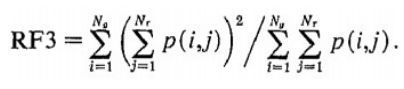

p (i, j) ser a entrada (i, j) na matriz de comprimento de percurso determinada;
N, seja o número de níveis de cinza na imagem,
Nr é o número de comprimentos de execução diferentes que ocorrem (de modo que a matriz é Não
por Nr) e
P é o número de pontos na imagem.

In [ ]:
def RF3(mat):
    
    """
    Função RF3:
    
    Essa função recebe como parâmetro:
    
        mat --> uma matriz resultante do processamento de: GLRLM.
    
    A função RF3 faz:
        
        Essa função faz o quadrado do número de comprimentos de execução;
        para cada nível de cinza. 
        A soma dos quadrados é então dividida pelo fator de normalização;
        do número total de trechos na figura. 
        Isso deve medir a não uniformidade do nível de cinza da imagem. 
        Quando as corridas são igualmente distribuídas pelos níveis de cinza, a função…
    
    A Função RF3 Devolve um valor.
    
    """
    
    # Pegando somente a quantidade de linhas e colunas:
    # Desta forma consigo garantir pegar o shape tanto de:
    # Imagens coloridas ou em escala de cinza.
    linhas, colunas = mat.shape[:2]
    
    # Somatorio da direita na formula:
    somatorio1 = 0
    
    # Somatorio de cada linha, a cada salto de linha ele zera:
    somatorioLinha = 0
    
    # Somatorio de cada linha ao quadrado.
    # Ele pega cada linha e faz seu somatorio;
    # Em seguida eleva ao quadrado.
    # Faz esse processo linha por linha
    somatorioQuadrado = 0
    
    # Percorrendo Linhas:
    for l in range(linhas):
        
        # Somatorio de cada linha ao quadrado.
        # Ele pega cada linha e faz seu somatorio;
        # Em seguida eleva ao quadrado.
        # Faz esse processo linha por linha
        somatorioLinha = 0
        #print('somatorioLinha zerado',somatorioLinha) # Conferindo
        
        # Percorrendo Colunas:
        for c in range(colunas):
            
            # Passando o 'pixel' para a variavel pixel (rsr):
            pixel = mat[l][c]
            
            
            # Calculando somatorio1
            #if pixel > 0:
            
            # somatorioLinha soma os valores dos  pixels; 
            # Somente numa linha, a cada salto de linha;
            # Ele zera
            somatorioLinha +=  pixel
            #print('somatorioLinha',somatorioLinha) # Conferindo
            
            # Calculando somatorio1
            #if pixel > 0:
            
            # Somatorio1 soma os valores de pixels:
            somatorio1 += pixel
            
        somatorioQuadrado += somatorioLinha ** 2
        #print('somatorioQuadrado',somatorioQuadrado) # Conferindo
    
    # Gerando o valor de: somatorio1/somatorio2:
    # A posição tem que ser aqui, dentro do for de linha, porém;
    # Tem que ser em baixo para poder ser computado.
    saida = somatorioQuadrado/somatorio1
    
    # Impressão para saber os valores dos somatorios:
    #print('saida quadrado',somatorioQuadrado,'somatorio',somatorio1) # Conferindo
    
    # Retornando o valor do calculo total:
    return saida

# Função RF4( ):

### Formula:

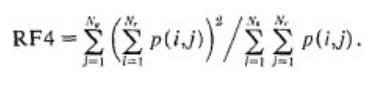

p (i, j) ser a entrada (i, j) na matriz de comprimento de percurso determinada;
N, seja o número de níveis de cinza na imagem,
Nr é o número de comprimentos de execução diferentes que ocorrem (de modo que a matriz é Não
por Nr) e
P é o número de pontos na imagem.

In [ ]:
def RF4(mat):
    
    """
    Função RF4:
    
    Essa função recebe como parâmetro:
    
        mat --> uma matriz resultante do processamento de: GLRLM.
    
    A função RF4 faz:
        
        Essa função faz o quadrado do número de execuções para cada comprimento. 
        A soma dos quadrados é então dividida pelo fator de normalização. 
        Essa função mede a não uniformidade dos comprimentos de execução. 
        Se as corridas forem igualmente distribuídas ao longo dos comprimentos,
        a função terá um valor baixo. 
        Grandes contagens de corridas contribuem mais para o treino.
    
    A Função RF4 Devolve um valor.
    
    """
    
    # Pegando somente a quantidade de linhas e colunas:
    # Desta forma consigo garantir pegar o shape tanto de:
    # Imagens coloridas ou em escala de cinza.
    linhas, colunas = mat.shape[:2]
    
    # Somatorio da direita na formula:
    somatorio1 = 0
    
    # Somatorio de cada linha, a cada salto de linha ele zera:
    somatorioColuna = 0
    
    # Somatorio de cada linha ao quadrado.
    # Ele pega cada linha e faz seu somatorio;
    # Em seguida eleva ao quadrado.
    # Faz esse processo linha por linha
    somatorioQuadrado = 0
    
    # Percorrendo Linhas:
    for c in range(colunas):
        
        # Somatorio de cada linha ao quadrado.
        # Ele pega cada linha e faz seu somatorio;
        # Em seguida eleva ao quadrado.
        # Faz esse processo linha por linha
        somatorioColuna = 0
        #print('coluna')
        #print('somatorioLinha zerado',somatorioLinha) # Conferindo
        
        # Percorrendo Colunas:
        for l in range(linhas):
            #print('linha')
            
            # Passando o 'pixel' para a variavel pixel (rsr):
            pixel = mat[l][c]
            
            # Calculando somatorio1
            #if pixel > 0:
            
            # somatorioLinha soma os valores dos  pixels; 
            # Somente numa linha, a cada salto de linha;
            # Ele zera
            somatorioColuna +=  pixel
            #print('somatorioLinha',somatorioLinha) # Conferindo
            
            # Calculando somatorio1
            #if pixel > 0:
            
            # Somatorio1 soma os valores de pixels:
            somatorio1 += pixel
            
        somatorioQuadrado += somatorioColuna ** 2
        #print('somatorioQuadrado',somatorioQuadrado) # Conferindo
    
    # Gerando o valor de: somatorio1/somatorio2:
    # A posição tem que ser aqui, dentro do for de linha, porém;
    # Tem que ser em baixo para poder ser computado.
    saida = somatorioQuadrado/somatorio1
    
    # Impressão para saber os valores dos somatorios:
    #print('saida quadrado',somatorioQuadrado,'somatorio',somatorio1) # Conferindo
    
    # Retornando o valor do calculo total:
    return saida

# Função RF5( ):

### Formula:

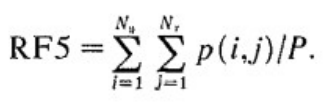![rf4.png](attachment:rf4.png)

p (i, j) ser a entrada (i, j) na matriz de comprimento de percurso determinada;
N, seja o número de níveis de cinza na imagem,
Nr é o número de comprimentos de execução diferentes que ocorrem (de modo que a matriz é Não
por Nr) e
P é o número de pontos na imagem.

In [ ]:
def RF5(mat):
    
    """
    Função RF5:
    
    Essa função recebe como parâmetro:
    
        mat --> uma matriz resultante do processamento de: GLRLM.
    
    A função RF5 faz:
        
        Essa função é uma proporção do número total de execuções;
        para o número total de execuções possíveis se todas as;
        execuções tiverem um comprimento de uma. 
        Deve ter seu valor mais baixo para imagens com a estrutura mais linear.
    
    A Função RF5 Devolve um valor.
    
    """
    
    # Pegando somente a quantidade de linhas e colunas:
    # Desta forma consigo garantir pegar o shape tanto de:
    # Imagens coloridas ou em escala de cinza.
    linhas, colunas = mat.shape[:2]
    
    # Somatorio da esquerda na formula:
    Somatorio = 0
    
    # P é a quantidade de pontos, ou seja: linhas * colunas:
    P = linhas * colunas
    #print('P',P)
    # Percorrendo Linhas:
    for l in range(linhas):

        # Percorrendo Colunas:
        for c in range(colunas):
            
            # Passando o 'pixel' para a variavel pixel (rsr):
            pixel = mat[l][c]
            
            # Somatorio1 soma os valores dos  pixels * por j's ao quadrado:
            Somatorio +=  pixel
            #print('Somatorio',Somatorio)
    
    # Gerando o valor de: somatorio1/somatorio2:           
    saida = Somatorio/P
    
    # Impressão para saber os valores dos somatorios:
    #print(saida, Somatorio,P) 
    
    # Retornando o valor do calculo total:
    return saida

# Funço programaGLRLM:


    --> Essa funço serve para para chamar as demais funçes.

In [ ]:
def programaGLRLM(imagem):
    
    """
    Função programaGLRLM:
    
    Essa função recebe como parâmetro:
    
        imagem --> uma imagem.
    
    A função imagem faz:
        
        Essa funço recebe uma imagem e extrai da mesma os seus 3 canais,
        em seguida ela aciona um conjunto de funçoes em seu corpo:
        rotacionando(), funGLRLM, funcrf1(), funcrf2(), funcrf3(), funcrf4() e funcrf5().
        As funçes acima acionam as funçes principais do codigo e organizam suas saidas.
    
    A funço programaGLRLM() Devolve um cojunto de valores provenientes deste processamento,
    que ser usado para a criaçao do .csv.
    
    """
    
    # Extraindo os 3 canais R, G e B:
    r = rgb2gray(imagem[:,:,0])
    g = rgb2gray(imagem[:,:,1])
    b = rgb2gray(imagem[:,:,2])
    
    def rotacionando(e):
        
        """
        Função rotacionando: 

        Essa função recebe como parâmetro:

            imagem --> uma imagem, um canal da imagem (r,g,b).

        A função imagem faz:

            Essa funço aciona a funçao funcaoRotacaoDaImagem(), que serve para rotacionar a imagem,
            e organiza sua saida.

        A funço rotacionando  Devolve um cojunto de valores provenientes deste processamento.

        """
        
        # Acionando a funço funcaoRotacaoDaImagem():
        s0 =  funcaoRotacaoDaImagem(e,0) # Angulo 0º
        s45 = funcaoRotacaoDaImagem(e,45) # Angulo 45º
        s90 = funcaoRotacaoDaImagem(e,90) #  Angulo 90º
        s135 = funcaoRotacaoDaImagem(e,135) # Angulo 135º
        
        # Retornaando as imagens rotacionadas:
        return s0, s45, s90, s135
    
    # Acionando a funço rotacionando():
    r0,r45,r90,r135 = rotacionando(r) # Rotacionando as imagens no canal r
    g0,g45,g90,g135 = rotacionando(g) # Rotacionando as imagens no canal g
    b0,b45,b90,b135 = rotacionando(b) # # Rotacionando as imagens no canal b
    
    def funGLRLM(e1,e2,e3,e4):
        
        """
        Função funGLRLM: 

        Essa função recebe como parâmetro:

            4 imagens --> (e1,e2,e3,e4), cada imagem e referente a um canala (r,g,b),
            em uma rotaço especifica (0,45,90,135).

        A função imagem faz:

            Essa funço aciona a funçao GLRLM(), que serve para gerar uma matriz GLRLM,
            e organiza sua saida.

        A funço funGLRLM  Devolve um cojunto de valores provenientes deste processamento.
        
        """
        
        # Acionando a funço GLRLM():
        # Transformando a imagem de entrada em uma matriz glrlm.
        s0 = GLRLM(e1)
        s45 = GLRLM(e2)
        s90 = GLRLM(e3)
        s135 = GLRLM(e4)
        
        # Retornando as matrizes:
        return s0, s45, s90, s135
    
    # Acionando aa funço funGLRLM():
    r0GL,r45GL,r90GL,r135GL = funGLRLM(r0,r45,r90,r135)#Criando a matriz glrlm no canal r nos graus: 0,45,90,135.
    g0GL,g45GL,g90GL,g135GL = funGLRLM(g0,g45,g90,g135)#Criando a matriz glrlm no canal g nos graus: 0,45,90,135.
    b0GL,b45GL,b90GL,b135GL = funGLRLM(b0,b45,b90,b135)#Criando a matriz glrlm no canal b nos graus: 0,45,90,135.
    
    def funcrf1(e1,e2,e3,e4):
        
        """
        Função funcrf1: 

        Essa função recebe como parâmetro:

            4 matrizes --> (e1,e2,e3,e4), cada matriz e referente a um canala (r,g,b),
            em uma rotaço especifica (0,45,90,135) resultante da funçao funGLRLM().

        A função funcrf1 faz:

            Essa funço aciona a funçao RF1(), que serve para calcular a matriz glrlm,
            e organiza sua saida.

        A funço funcrf1  Devolve um cojunto de valores provenientes deste processamento.
        
        """
        # Acionando a funço RF1():
        s0 = RF1(e1)
        s45 = RF1(e2)
        s90 = RF1(e3)
        s135 = RF1(e4)
        
        # Saida
        return s0, s45, s90, s135
    
    # Acionando a funçao funcrf1():
    r0GLF1,r45GLF1,r90GLF1,r135GLF1 = funcrf1(r0GL,r45GL,r90GL,r135GL) 
    g0GLF1,g45GLF1,g90GLF1,g135GLF1 = funcrf1(g0GL,g45GL,g90GL,g135GL)
    b0GLF1,b45GLF1,b90GLF1,b135GLF1 = funcrf1(b0GL,b45GL,b90GL,b135GL)
    
    def funcrf2(e1,e2,e3,e4):
        
        """
        Função funcrf2: 

        Essa função recebe como parâmetro:

            4 matrizes --> (e1,e2,e3,e4), cada matriz e referente a um canala (r,g,b),
            em uma rotaço especifica (0,45,90,135) resultante da funçao funGLRLM().

        A função funcrf2 faz:

            Essa funço aciona a funçao RF2(), que serve para calcular a matriz glrlm,
            e organiza sua saida.

        A funço funcrf2  Devolve um cojunto de valores provenientes deste processamento.
        
        """
        
        # Acionando a funço RF2():
        s0 = RF2(e1)
        s45 = RF2(e2)
        s90 = RF2(e3)
        s135 = RF2(e4)
        
        # Saida
        return s0, s45, s90, s135
    
    # Acionando a funçao funcrf2():
    r0GLF2,r45GLF2,r90GLF2,r135GLF2 = funcrf2(r0GL,r45GL,r90GL,r135GL) 
    g0GLF2,g45GLF2,g90GLF2,g135GLF2 = funcrf2(g0GL,g45GL,g90GL,g135GL)
    b0GLF2,b45GLF2,b90GLF2,b135GLF2 = funcrf2(b0GL,b45GL,b90GL,b135GL)
    
    def funcrf3(e1,e2,e3,e4):
                
        """
        Função funcrf3: 

        Essa função recebe como parâmetro:

            4 matrizes --> (e1,e2,e3,e4), cada matriz e referente a um canala (r,g,b),
            em uma rotaço especifica (0,45,90,135) resultante da funçao funGLRLM().

        A função funcrf3 faz:

            Essa funço aciona a funçao RF3(), que serve para calcular a matriz glrlm,
            e organiza sua saida.

        A funço funcrf3  Devolve um cojunto de valores provenientes deste processamento.
        
        """
        
        # Acionando a funço RF3():
        s0 = RF3(e1)
        s45 = RF3(e2)
        s90 = RF3(e3)
        s135 = RF3(e4)
        
        # Saida:
        return s0, s45, s90, s135
    
    # Acionando a funçao funcrf3():
    r0GLF3,r45GLF3,r90GLF3,r135GLF3 = funcrf3(r0GL,r45GL,r90GL,r135GL) 
    g0GLF3,g45GLF3,g90GLF3,g135GLF3 = funcrf3(g0GL,g45GL,g90GL,g135GL)
    b0GLF3,b45GLF3,b90GLF3,b135GLF3 = funcrf3(b0GL,b45GL,b90GL,b135GL)
    
    def funcrf4(e1,e2,e3,e4):
        
        """
        Função funcrf4: 

        Essa função recebe como parâmetro:

            4 matrizes --> (e1,e2,e3,e4), cada matriz e referente a um canala (r,g,b),
            em uma rotaço especifica (0,45,90,135) resultante da funçao funGLRLM().

        A função funcrf4 faz:

            Essa funço aciona a funçao RF4(), que serve para calcular a matriz glrlm,
            e organiza sua saida.

        A funço funcrf4  Devolve um cojunto de valores provenientes deste processamento.
        
        """
        
        # Acionando a funço RF4():
        s0 = RF4(e1)
        s45 = RF4(e2)
        s90 = RF4(e3)
        s135 = RF4(e4)
        
        # Saida:
        return s0, s45, s90, s135
   
    # Acionando a funçao funcrf4():
    r0GLF4,r45GLF4,r90GLF4,r135GLF4 = funcrf4(r0GL,r45GL,r90GL,r135GL) 
    g0GLF4,g45GLF4,g90GLF4,g135GLF4 = funcrf4(g0GL,g45GL,g90GL,g135GL)
    b0GLF4,b45GLF4,b90GLF4,b135GLF4 = funcrf4(b0GL,b45GL,b90GL,b135GL)
    
    def funcrf5(e1,e2,e3,e4):
        
        
        """
        Função funcrf5: 

        Essa função recebe como parâmetro:

            4 matrizes --> (e1,e2,e3,e4), cada matriz e referente a um canala (r,g,b),
            em uma rotaço especifica (0,45,90,135) resultante da funçao funGLRLM().

        A função funcrf5 faz:

            Essa funço aciona a funçao RF5(), que serve para calcular a matriz glrlm,
            e organiza sua saida.

        A funço funcrf5  Devolve um cojunto de valores provenientes deste processamento.
        
        """
        
        # Acionando a funço RF5():
        s0 = RF5(e1)
        s45 = RF5(e2)
        s90 = RF5(e3)
        s135 = RF5(e4)
        
        # Saida:
        return s0, s45, s90, s135
    
    # Acionando a funçao funcrf5():
    r0GLF5,r45GLF5,r90GLF5,r135GLF5 = funcrf5(r0GL,r45GL,r90GL,r135GL) 
    g0GLF5,g45GLF5,g90GLF5,g135GLF5 = funcrf5(g0GL,g45GL,g90GL,g135GL)
    b0GLF5,b45GLF5,b90GLF5,b135GLF5 = funcrf5(b0GL,b45GL,b90GL,b135GL)
    
    # Montando as listas que serão usadas como saída,
    # Referentes ao canal R.
    R0Fs = [r0GLF1,r0GLF2,r0GLF3,r0GLF4,r0GLF5]
    R45Fs = [r45GLF1,r45GLF2,r45GLF3,r45GLF4,r45GLF5]
    R90Fs = [r90GLF1,r90GLF2,r90GLF3,r90GLF4,r90GLF5]
    R135Fs = [r135GLF1,r135GLF2,r135GLF3,r135GLF4,r135GLF5]
    
    # Montando as listas que serão usadas como saída,
    # Referentes ao canal G.
    G0Fs = [g0GLF1,g0GLF2,g0GLF3,g0GLF4,g0GLF5]
    G45Fs = [g45GLF1,g45GLF2,g45GLF3,g45GLF4,g45GLF5]
    G90Fs = [g90GLF1,g90GLF2,g90GLF3,g90GLF4,g90GLF5]
    G135Fs = [g135GLF1,g135GLF2,g135GLF3,g135GLF4,g135GLF5]
    
    # Montando as listas que serão usadas como saída,
    # Referentes ao canal B.
    B0Fs = [b0GLF1,b0GLF2,b0GLF3,b0GLF4,b0GLF5]
    B45Fs = [b45GLF1,b45GLF2,b45GLF3,b45GLF4,b45GLF5]
    B90Fs = [b90GLF1,b90GLF2,b90GLF3,b90GLF4,b90GLF5]
    B135Fs = [b135GLF1,b135GLF2,b135GLF3,b135GLF4,b135GLF5]
    
    # Montando uma lista 'full':
    fullDataFrame = [r0GLF1,r45GLF1,r90GLF1,r135GLF1,g0GLF1,g45GLF1,g90GLF1,g135GLF1,b0GLF1,b45GLF1,b90GLF1,
             b135GLF1,r0GLF2,r45GLF2,r90GLF2,r135GLF2,g0GLF2,g45GLF2,g90GLF2,g135GLF2,b0GLF2,b45GLF2,
             b90GLF2,b135GLF2,r0GLF3,r45GLF3,r90GLF3,r135GLF3,g0GLF3,g45GLF3,g90GLF3,g135GLF3,b0GLF3,
             b45GLF3,b90GLF3,b135GLF3,r0GLF4,r45GLF4,r90GLF4,r135GLF4,g0GLF4,g45GLF4,g90GLF4,g135GLF4,
             b0GLF4,b45GLF4,b90GLF4,b135GLF4,r0GLF5,r45GLF5,r90GLF5,r135GLF5,g0GLF5,g45GLF5,g90GLF5,
             g135GLF5,b0GLF5,b45GLF5,b90GLF5,b135GLF5]
    
    # Retornando as listas:
    return fullDataFrame, R0Fs, R45Fs, R90Fs, R135Fs, G0Fs, G45Fs, G90Fs, G135Fs, B0Fs, B45Fs, B90Fs, B135Fs

# Classe rodaRoda():

    --> Essa classe é como uma classe main.
        

In [ ]:
def rodaRoda():
    
    """
    Função rodaRoda: 

        Essa função não recebe parâmetro:
        
        Porém ela pede que você digite o caminho das imagens para criar a coleção.

        A função rodaRoda faz:

            Essa funço aciona a funçao programaGLRLM(), que serve para retornar os Dataframes,
            e organiza sua saida em conjunto.

        A funço rodaRoda  Devolve um cojunto de Dataframes.
    
     ***Homenagem ao apresentador de televisão Silvio Santos.***
    """
    
    caminho = input("Digite o caminho de seu conjunto de imagens ex: imagens/*jpg: ")
    imagens = imread_collection(caminho)
    print("Agora sente e vá assistir todos episódios de Game of Thrones! ")
    
    inicio = time.time()
    
    # Criando um Dataframe para receber todos os dados 'full':
    fullDataFrame = pd.DataFrame(columns=['r0GLF1','r45GLF1','r90GLF1','r135GLF1','g0GLF1','g45GLF1','g90GLF1','g135GLF1','b0GLF1','b45GLF1','b90GLF1',
             'b135GLF1','r0GLF2','r45GLF2','r90GLF2','r135GLF2','g0GLF2','g45GLF2','g90GLF2','g135GLF2','b0GLF2','b45GLF2',
             'b90GLF2','b135GLF2','r0GLF3','r45GLF3','r90GLF3','r135GLF3','g0GLF3','g45GLF3','g90GLF3','g135GLF3','b0GLF3',
             'b45GLF3','b90GLF3','b135GLF3','r0GLF4','r45GLF4','r90GLF4','r135GLF4','g0GLF4','g45GLF4','g90GLF4','g135GLF4',
             'b0GLF4','b45GLF4','b90GLF4','b135GLF4','r0GLF5','r45GLF5','r90GLF5','r135GLF5','g0GLF5','g45GLF5','g90GLF5',
             'g135GLF5','b0GLF5','b45GLF5','b90GLF5','b135GLF5'])
    
    # Criando um Dataframe para receber todos os dados de R0Fs:
    R0Fs = pd.DataFrame(columns=['r0GLF1','r0GLF2','r0GLF3','r0GLF4','r0GLF5'])
    # Criando um Dataframe para receber todos os dados de R45Fs:
    R45Fs = pd.DataFrame(columns=['r45GLF1','r45GLF2','r45GLF3','r45GLF4','r45GLF5'])
    # Criando um Dataframe para receber todos os dados de R90Fs:
    R90Fs = pd.DataFrame(columns=['r90GLF1','r90GLF2','r90GLF3','r90GLF4','r90GLF5'])
    # Criando um Dataframe para receber todos os dados de R135Fs:
    R135Fs = pd.DataFrame(columns=['r135GLF1','r135GLF2','r135GLF3','r135GLF4','r135GLF5'])
    
    # Criando um Dataframe para receber todos os dados de G0Fs:
    G0Fs = pd.DataFrame(columns=['g0GLF1','g0GLF2','g0GLF3','g0GLF4','g0GLF5'])
    # Criando um Dataframe para receber todos os dados de G45Fs:
    G45Fs = pd.DataFrame(columns=['g45GLF1','g45GLF2','g45GLF3','g45GLF4','g45GLF5'])
    # Criando um Dataframe para receber todos os dados de G90Fs:
    G90Fs = pd.DataFrame(columns=['g90GLF1','g90GLF2','g90GLF3','g90GLF4','g90GLF5'])
    # Criando um Dataframe para receber todos os dados de G135Fs:
    G135Fs = pd.DataFrame(columns=['g135GLF1','g135GLF2','g135GLF3','g135GLF4','g135GLF5'])
    
    # Criando um Dataframe para receber todos os dados de B0Fs:
    B0Fs = pd.DataFrame(columns=['b0GLF1','b0GLF2','b0GLF3','b0GLF4','b0GLF5'])
    # Criando um Dataframe para receber todos os dados de B45Fs:
    B45Fs = pd.DataFrame(columns=['b45GLF1','b45GLF2','b45GLF3','b45GLF4','b45GLF5'])
    # Criando um Dataframe para receber todos os dados de B90Fs:
    B90Fs = pd.DataFrame(columns=['b90GLF1','b90GLF2','b90GLF3','b90GLF4','b90GLF5'])
    # Criando um Dataframe para receber todos os dados de B135Fs:
    B135Fs = pd.DataFrame(columns=['b135GLF1','b135GLF2','b135GLF3','b135GLF4','b135GLF5'])
    
    # Fazendo um for para enviar imagem por imagem a função programaGLRLM():
    for i,j in enumerate(imagens):
        
        # Acessando a função programaGLRLM(), e passando j como objeto (imagem):
        sai01, sai02, sai03, sai04, sai05, sai06, sai07, sai08, sai09, sai10, sai11, sai12, sai13 = programaGLRLM(j)
        
        # Acidionando aos DataFrames, na posição i, os resultados da função programaGLRLM():
        
        fullDataFrame.loc[i] = sai01 
        
        R0Fs.loc[i] = sai02
        R45Fs.loc[i] = sai03
        R90Fs.loc[i] = sai04
        R135Fs.loc[i] = sai05
        
        G0Fs.loc[i] = sai06
        G45Fs.loc[i] = sai07
        G90Fs.loc[i] = sai08
        G135Fs.loc[i] = sai09
        
        B0Fs.loc[i] = sai10
        B45Fs.loc[i] = sai11
        B90Fs.loc[i] = sai12
        B135Fs.loc[i] = sai13
        
    
    fim = time.time()
    # Calcula a subtração dos times
    tempo_processamento = fim - inicio
    print("Tempo Total de Processamento: ",tempo_processamento)
    
    print('Todo seu conjunto de imagens foi processado, ufa!')
    print('O próximo passo é criar os 13 .cvs, pra isso você só precisa rodar a proxima cela.')
    print('Boa sorte!')
    
    # Retornando os Dataframes:
    return fullDataFrame, R0Fs, R45Fs, R90Fs, R135Fs, G0Fs, G45Fs, G90Fs, G135Fs, B0Fs, B45Fs, B90Fs, B135Fs

# Chamando a função rodaRoda(), minha função Main:

    --> Rode a cela e defina o path das imagens.

In [ ]:
fullDataFrame, R0Fs, R45Fs, R90Fs,R135Fs, G0Fs, G45Fs, G90Fs, G135Fs, B0Fs, B45Fs, B90Fs, B135Fs = rodaRoda()

# Gerando todos os .csv (13):

    --> Esses csv's são referente ao X.

In [ ]:
# Criando uma pasta para salvar os arquivos .csv:
os.mkdir("csv")

fullDataFrame.to_csv('csv/fullDataFrame.csv')
R0Fs.to_csv('csv/R0Fs.csv')
R45Fs.to_csv('csv/R45Fs.csv')
R90Fs.to_csv('csv/R90Fs.csv')
R135Fs.to_csv('csv/R135Fs.csv')
G0Fs.to_csv('csv/G0Fs.csv')
G45Fs.to_csv('csv/G45Fs.csv')
G90Fs.to_csv('csv/G90Fs.csv')
G135Fs.to_csv('csv/G135Fs.csv')
B0Fs.to_csv('csv/B0Fs.csv')
B45Fs.to_csv('csv/B45Fs.csv')
B90Fs.to_csv('csv/B90Fs.csv')
B135Fs.to_csv('csv/B135Fs.csv')

# Testando a saida de um csv:

In [ ]:
saida = pd.read_csv('csv/fullDataFrame.csv')
saida

# Criando o .csv equivalente ao Y do treino das classes: 'Retinopathy grade'  e 'Risk of macular edema'.

In [ ]:
labelsTreino = pd.read_csv('labelTreino.csv')
retinopathyGradeLabelTreino = labelsTreino['Retinopathy grade']
riskOfMacularEdemaLabelTreino = labelsTreino['Risk of macular edema ']
riskOfMacularEdemaLabelTreino.head()

# Criando o .csv equivalente ao Y do teste das classes: 'Retinopathy grade'  e 'Risk of macular edema'.

In [ ]:
labelsTeste = pd.read_csv('b. IDRiD_Disease Grading_Testing Labels.csv')
retinopathyGradeLabelTeste = labelsTeste['Retinopathy grade']
riskOfMacularEdemaLabelTreinoTeste = labelsTeste['Risk of macular edema ']